# Finding the Best Neighborhood in Pittsburgh: 
## Factoring in Property Values
Data borrowed from https://data.wprdc.org/dataset/real-estate-sales

### Getting Started

In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [13]:
# Importing the data
property_data = pd.read_csv("PghPropertySaleData.csv", low_memory = False)

In [14]:
# Previewing the data
property_data.head(5)

,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSDIR,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYADDRESSUNITDESC,PROPERTYUNITNO,PROPERTYCITY,PROPERTYSTATE,...,MUNIDESC,RECORDDATE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,SALECODE,SALEDESC,INSTRTYP,INSTRTYPDESC
0,1075F00108000000,4720.0,,NaN,HIGHPOINT,DR,NaN,NaN,GIBSONIA,PA,...,Hampton,2012-09-27,2012-09-27,120000.0,15020,356,3,LOVE AND AFFECTION SALE,DE,DEED
1,0011A00237000000,0.0,,NaN,LOMBARD,ST,NaN,NaN,PITTSBURGH,PA,...,3rd Ward - PITTSBURGH,2015-01-06,2015-01-06,1783.0,TR15,00002,2,CITY TREASURER SALE,TS,TREASURER DEED
2,0011J00047000000,1903.0,,NaN,FORBES,AVE,NaN,NaN,PITTSBURGH,PA,...,1st Ward - PITTSBURGH,2012-10-26,2012-10-26,4643.0,TR13,003,2,CITY TREASURER SALE,TS,TREASURER DEED
3,0113B00029000000,479.0,,NaN,ROOSEVELT,AVE,NaN,NaN,PITTSBURGH,PA,...,Bellevue,2017-03-27,2017-03-06,0.0,16739,166,3,LOVE AND AFFECTION SALE,CO,CORRECTIVE DEED
4,0119S00024000000,5418.0,,NaN,CARNEGIE,ST,NaN,NaN,PITTSBURGH,PA,...,10th Ward - PITTSBURGH,2015-02-04,2015-02-04,27541.0,TR15,00059,GV,GOVERNMENT SALE,TS,TREASURER DEED


In [15]:
# In the preview, I noticed that the property in the fourth row sold for a price of $0.
# Looking through the .dbf file, I noticed that there are several other extremely low sold prices, such as $0, $1, and $10. 
# Therefore, I am only considering prices above $1,000 to mitigate the infuence of global outliers. 
property_data = property_data[property_data.PRICE > 1000]
# In importing the CSV file, the zip codes were turned into floats. This will cast them back into the int data type
property_data['PROPERTYZIP'] = property_data['PROPERTYZIP'].astype(int)

In [16]:
# Finding the mean of the property sold prices for all properties sharing the same zip code
price_property_data = property_data[['PROPERTYZIP','PRICE']].groupby(['PROPERTYZIP']).mean()
price_property_data

,PRICE
PROPERTYZIP,
15003,86601.668605
15005,529842.319527
15006,73238.805970
15007,172196.555556
15012,119375.000000
...,...
15642,90610.318182
15668,233826.666667
16046,408128.726704


In [17]:
# Rounding the mean property sales prices to the nearest dollar
price_property_data['PRICE'] = price_property_data['PRICE'].astype(int)
# Sorting the data by price
price_property_data.sort_values(by=['PRICE'],inplace=True)
price_property_data.head(10)

,PRICE
PROPERTYZIP,
15028,24032
15089,24272
15104,34736
15110,36851
15045,47284
15035,47925
15112,52032
15210,59941
15034,60619


### Establishing a points system and price brackets
Zip codes with properties within a certain threshold will be assigned a fixed number of points.          

Team members' data sets also utilize a point system.         

The neighborood with the highest combined number of points will be considered the best.

In [18]:
# First, price brackets need to be established. To do this, I will divide the distribution into five tiers, based on percentiles.

# Creating a new column called "Percentile Rank", which shows the percentage of prices that any one price is greater than.
price_property_data['Percentile Rank'] = price_property_data.PRICE.rank(pct = True)

In [19]:
# Now, I am creating conditions for the program to check in order to set a point value based on the Percentile Rank values. 

conditions = [
    (price_property_data['Percentile Rank'] <= .2),
    (price_property_data['Percentile Rank'] > .2) & (price_property_data['Percentile Rank'] <= .4),
    (price_property_data['Percentile Rank'] > .4) & (price_property_data['Percentile Rank'] <= .6),
    (price_property_data['Percentile Rank'] > .6) & (price_property_data['Percentile Rank'] <= .8),
    (price_property_data['Percentile Rank'] > .8)]
# The points work with the above conditions. If the first condition is met (percentile rank below .2), one point is assigned.
# If the second condition is met (percentile rank below or equal to .4 and greater than .2), then two poitns are assigned.
# This method gives more points to zip codes with higher percentile prices.
points = ['1', '2', '3', '4', '5']
# Making a new column called "Points" and adding point values based on the above conditions.
price_property_data['Points'] = np.select(conditions, points)
# Sorting the data first by points, and then by price.
price_property_data.sort_values(by=['Points', 'PRICE'],inplace=True, ascending=False)
price_property_data.head(5)


,PRICE,Percentile Rank,Points
PROPERTYZIP,,,
15275,6003730,1.000000,5
15276,1850783,0.991453,5
15222,1274521,0.982906,5
15086,911245,0.974359,5
15142,570302,0.965812,5


### As seen above, the best neighborhood judged purely from property values is 15275, which is Pittsburgh. There is no specific neighborhood attached to that zip code, nor the runner-up, so I will conclude that 15222 - Downtown - is the best neighborhood.

In [20]:
# Grabbing the data to put in the final notebook
#price_property_data.to_csv('property_data.csv')

## Visualizing the data

(-0.5, 116.5, 0.0, 6303916.5)

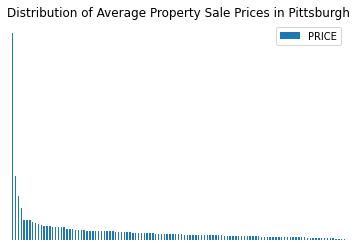

In [21]:
price_property_data.reset_index(inplace=True)
price_property_data = price_property_data.astype(int)
graph = price_property_data.plot.bar(x ='PROPERTYZIP',y='PRICE', title="Distribution of Average Property Sale Prices in Pittsburgh")
plt.axis('off')


### As we can see, there is one major outlier in the form of zipcode 15275, with an average property value of 6 million dollars.